In [13]:
from plot_params import * 
from scipy.stats import qmc
from tqdm import tqdm
import numpy as np 

In [14]:
r_min = -2
r_max = 0.46
i_min = -1.12
i_max = 1.12
area_box = (r_max - r_min) * (i_max - i_min)

In [33]:
def check_inside_mandlebrot(i, c):
    z = 0 + 0j
    for i in range(i):
        z = np.square(z) + c
        if np.abs(z) > 2:
            return False
    return True

def mandlebrot_area(i, s):

    real = np.random.uniform(r_min, r_max, size=s)
    imaginary = np.random.uniform(i_min, i_max, size=s) * 1j
    random_complex_numbers = real + imaginary
    in_mandlebrot = 0
 
    for z in random_complex_numbers:
        if check_inside_mandlebrot(i, z):
            in_mandlebrot += 1

    area = in_mandlebrot / s * area_box

    return area

def expected_variance(theta, n):
    return theta * (1 - theta) / n


def LHC_samples(n):
    sampler = qmc.LatinHypercube(d=2)
    sample = sampler.random(n=n) 
    sample = qmc.scale(sample, -2, 1.5)

sam = LHC_samples(5)

ValueError: Sample dimension is different than bounds dimension

In [32]:
sam[:, 0]

array([0.64023529, 0.17526131, 0.50970891, 0.31403658, 0.93447785])

In [16]:
n_iterations = 100

min_i = 10
max_i = 40
n_different_i = 8

min_s = 50
max_s = 200
n_different_s = 8

sample_range = np.linspace(min_s, max_s, n_different_s, dtype=int)
i_range = np.linspace(min_i, max_i, n_different_i, dtype=int)

100%|██████████| 8/8 [00:29<00:00,  3.71s/it]


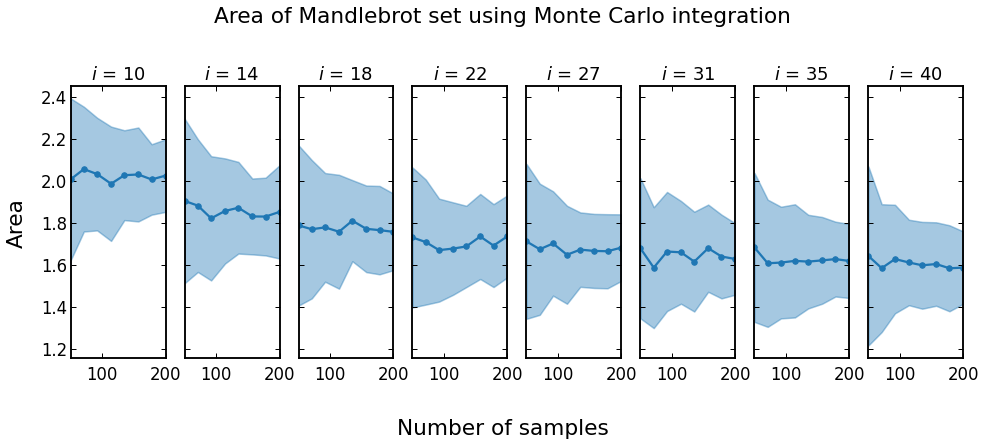

In [17]:
arr3d = np.zeros((n_different_i, n_different_s))

fig, axs = plt.subplots(1, n_different_i, figsize=(16, 5), sharex=True, sharey=True)

axs = axs.ravel()

for p in tqdm(range(n_different_i)):

    results = np.zeros((n_iterations, n_different_s))
    # expected_variances = np.zeros((n_iterations, n_different_s))

    for m in range(n_different_s):
        for n in range(n_iterations):
            i = i_range[p]
            s = sample_range[m]
            area = mandlebrot_area(i, s)
            results[n][m] = area

            # theta = area / area_box
            # exp_var = expected_variance(theta, s)
            # expected_variances[n][m] = exp_var
    
    means = results.mean(axis=0)
    stds = results.std(axis=0)

    arr3d[p] = means
    
    axs[p].plot(sample_range, means, '-o', markersize=5.5)
    axs[p].fill_between(sample_range, means - stds, means + stds, alpha=0.4, edgecolor='tab:blue')
    axs[p].set_title(f'$i$ = {i}')
    axs[p].set_xlim(min_s, max_s)

fig.suptitle('Area of Mandlebrot set using Monte Carlo integration', y=1.1)
fig.supxlabel('Number of samples', y=-0.1)
fig.supylabel('Area', x=0.07)

plt.show()

In [18]:
# N runs with max_i and max_s



100%|██████████| 100/100 [00:01<00:00, 89.10it/s]


100%|██████████| 8/8 [00:05<00:00,  1.37it/s]


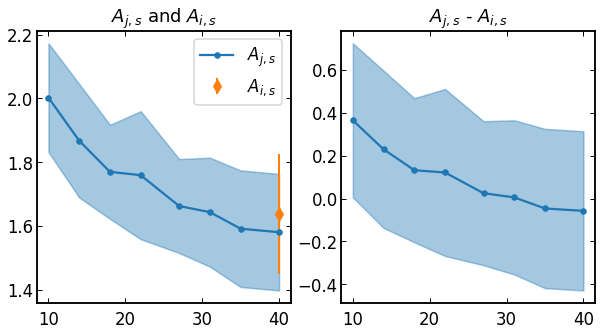

In [19]:

""" 
Stukje 
"""

max_result = np.zeros((n_iterations))

for n in tqdm(range(n_iterations)):
    i = max_i
    s = max_s
    area = mandlebrot_area(i, s)
    max_result[n] = area

max_result_mean = max_result.mean()
max_result_std = max_result.std()

results = np.zeros((n_iterations, n_different_i))

for m in tqdm(range(n_different_i)):
    for n in range(n_iterations):
        i = i_range[m]
        s = max_s
        area = mandlebrot_area(i, s)
        results[n][m] = area

means = results.mean(axis=0)
stds = results.std(axis=0)

diff_means = means - max_result_mean
diff_stds = stds + max_result_std

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(i_range, means, '-o', markersize=5.5, label='$A_{j, s}$')
axs[0].fill_between(i_range, means - stds, means + stds, alpha=0.4, edgecolor='tab:blue')
axs[0].errorbar(max_i, max_result_mean, max_result_std, fmt='d', markersize=10, linewidth=2, label='$A_{i, s}$')
axs[0].legend()
axs[0].set(
    title='$A_{j, s}$ and $A_{i, s}$'
)

axs[1].plot(i_range, diff_means, '-o', markersize=5.5)
axs[1].fill_between(i_range, diff_means - diff_stds, diff_means + diff_stds, alpha=0.4, edgecolor='tab:blue')
axs[1].set(
    title='$A_{j, s}$ - $A_{i, s}$'
)
plt.show()

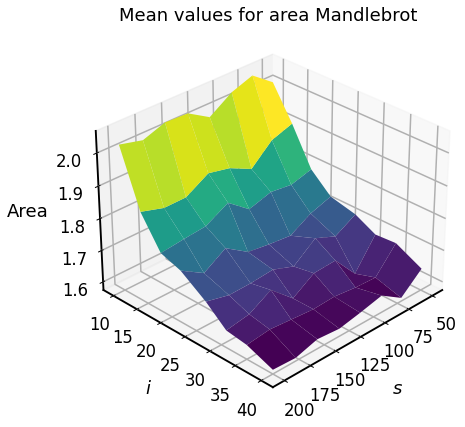

In [20]:
xx, yy = np.meshgrid(sample_range, i_range)

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, arr3d, cmap='viridis')
ax.set(
    xlabel='$s$',
    ylabel='$i$', 
    zlabel='Area',
    title='Mean values for area Mandlebrot'
)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20

ax.view_init(30, 45)
plt.show()

In [21]:
# fig, axs = plt.subplots(1, n_different_s, figsize=(16, 7), sharex=True, sharey=True)
# axs = axs.ravel()

# for p in tqdm(range(n_different_s)):

#     results = np.zeros((n_iterations, n_different_i))

#     for m in range(n_different_i):
#         for n in range(n_iterations):
#             i = i_range[m]
#             s = sample_range[p]
#             area = mandlebrot_area(i, s)
#             results[n][m] = area

#     means = results.mean(axis=0)
#     stds = results.std(axis=0)

#     axs[p].plot(i_range, means, '-o', markersize=5.5)
#     axs[p].fill_between(i_range, means - stds, means + stds, alpha=0.4, edgecolor='tab:blue')
#     axs[p].set_title(f'$s$={s}')
#     axs[p].set_xlim(min_i, max_i)
#     # axs[p].set_xticks(([min_i, max_i]))

# fig.suptitle('Area of Mandlebrot set using Monte Carlo integration')
# fig.supxlabel('Number of checks')
# fig.supylabel('Area')

# plt.show()